
## Задание

    1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
    2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
    3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
    4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
    5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
    6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
    7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
    8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
    9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
    10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
    11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

Приведенная схема исследования является рекомендуемой. В зависимости от решаемой задачи возможны модификации.


## 1. Выбор и подготовка набора данных.

В качестве набора данных будем использовать набор Diabetes Health Indicators Dataset (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). Решение данной задачи позволит обнаруживать и предсказывать наличие у человека, такого неприятного заболевания как диабет, по его анализам и образу жизни. При построении успешной модели можно будет прогнозировать результат заранее, что позволит предупредить её развитие.

Наш csv содержит следующие поля:

- Diabetes_binary - 1 - Есть Диабет/ 0 - Диабета нет.
- HighBP - 1 - Высокое кровяное давление/ 0 - низкое кровяное давление.
- HighChol - 1 - Высокое содержание холестерина/ 0 - Низкое содержание холестерина
- CholCheck - 1 - Проверял содержание холестерина в течении последних 5-ти лет / 0 - не проверял
- BMI - Индекс массы тела
- Smoker - Курил ли человека более 100 сигарет за свою жизнь? Да - 1/ Нет - 0
- Stroke - Был ли у человека инсульт? Да - 1/ Нет - 0.
- HeartDiseaseorAttack - Ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ) 0 = нет 1 = да
- PhysActivity - Физическая активность за последние 30 дней, не включая работу 0 = нет 1 = да
- Fruits - Употребляет фрукты 1 или более раз в день 0 = нет 1 = да
- Veggies - Употребляет овощи 1 или более раз в день 0 = нет 1 = да
- HvyAlcoholConsumption - Сильно пьющие (взрослые мужчины, употребляющие более 14 порций алкоголя в неделю, и взрослые женщины, употребляющие более 7 порций алкоголя в неделю) 0 = нет
- AnyHealthcare - Иметь какое-либо медицинское страхование, включая медицинскую страховку, предоплаченные планы, такие как HMO и т. д. 0 = нет 1 = да 
- NoDocbcCost - Были ли случаи за последние 12 месяцев, когда вам нужно было обратиться к врачу, но вы не могли этого сделать из-за стоимости? 0 = нет 1 = да
- GenHlth - Могли бы вы сказать, что в целом ваше здоровье: по шкале от 1 до 5 1 = отличное 2 = очень хорошее 3 = хорошее 4 = удовлетворительное 5 = плохое
- MentHlth - Теперь подумайте о своем психическом здоровье, которое включает стресс, депрессию и проблемы с эмоциями, о том, как
- PhysHlth - Теперь подумайте о своем физическом здоровье, которое включает в себя физические болезни и травмы, сколько дней в течение последних 30 дней
- DiffWalk - Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице? 0 = нет 1 = да
- Sex - 0 = женский 1 = мужской
- Age - 13-уровневая возрастная категория (_AGEG5YR, см. кодовую книгу) 1 = 18–24 года 9 = 60–64 года 13 = 80 лет или старше
- Education - Уровень образования (EDUCA см. кодовую книгу)
- Income - Шкала доходов (INCOME2 см. кодовую книгу)

Будем решать задачу бинарной классификации - наличие диабета у человека

#### Импорт библиотек

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Загрузка данных

In [30]:
data = pd.read_csv('./diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [31]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [32]:
print(f'Внутри набора данных {data.shape[0]} строк и {data.shape[1]} колонн.') 

Внутри набора данных 70692 строк и 22 колонн.


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [34]:
data = data.astype('int')

## 2. Разведочный анализ

In [35]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [36]:
total = data.shape[0]
class_0, class_1 = data['Diabetes_binary'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 50.0%, а класс 1 составляет 50.0%.


Как можно заметить набор данных является сбалансированным.

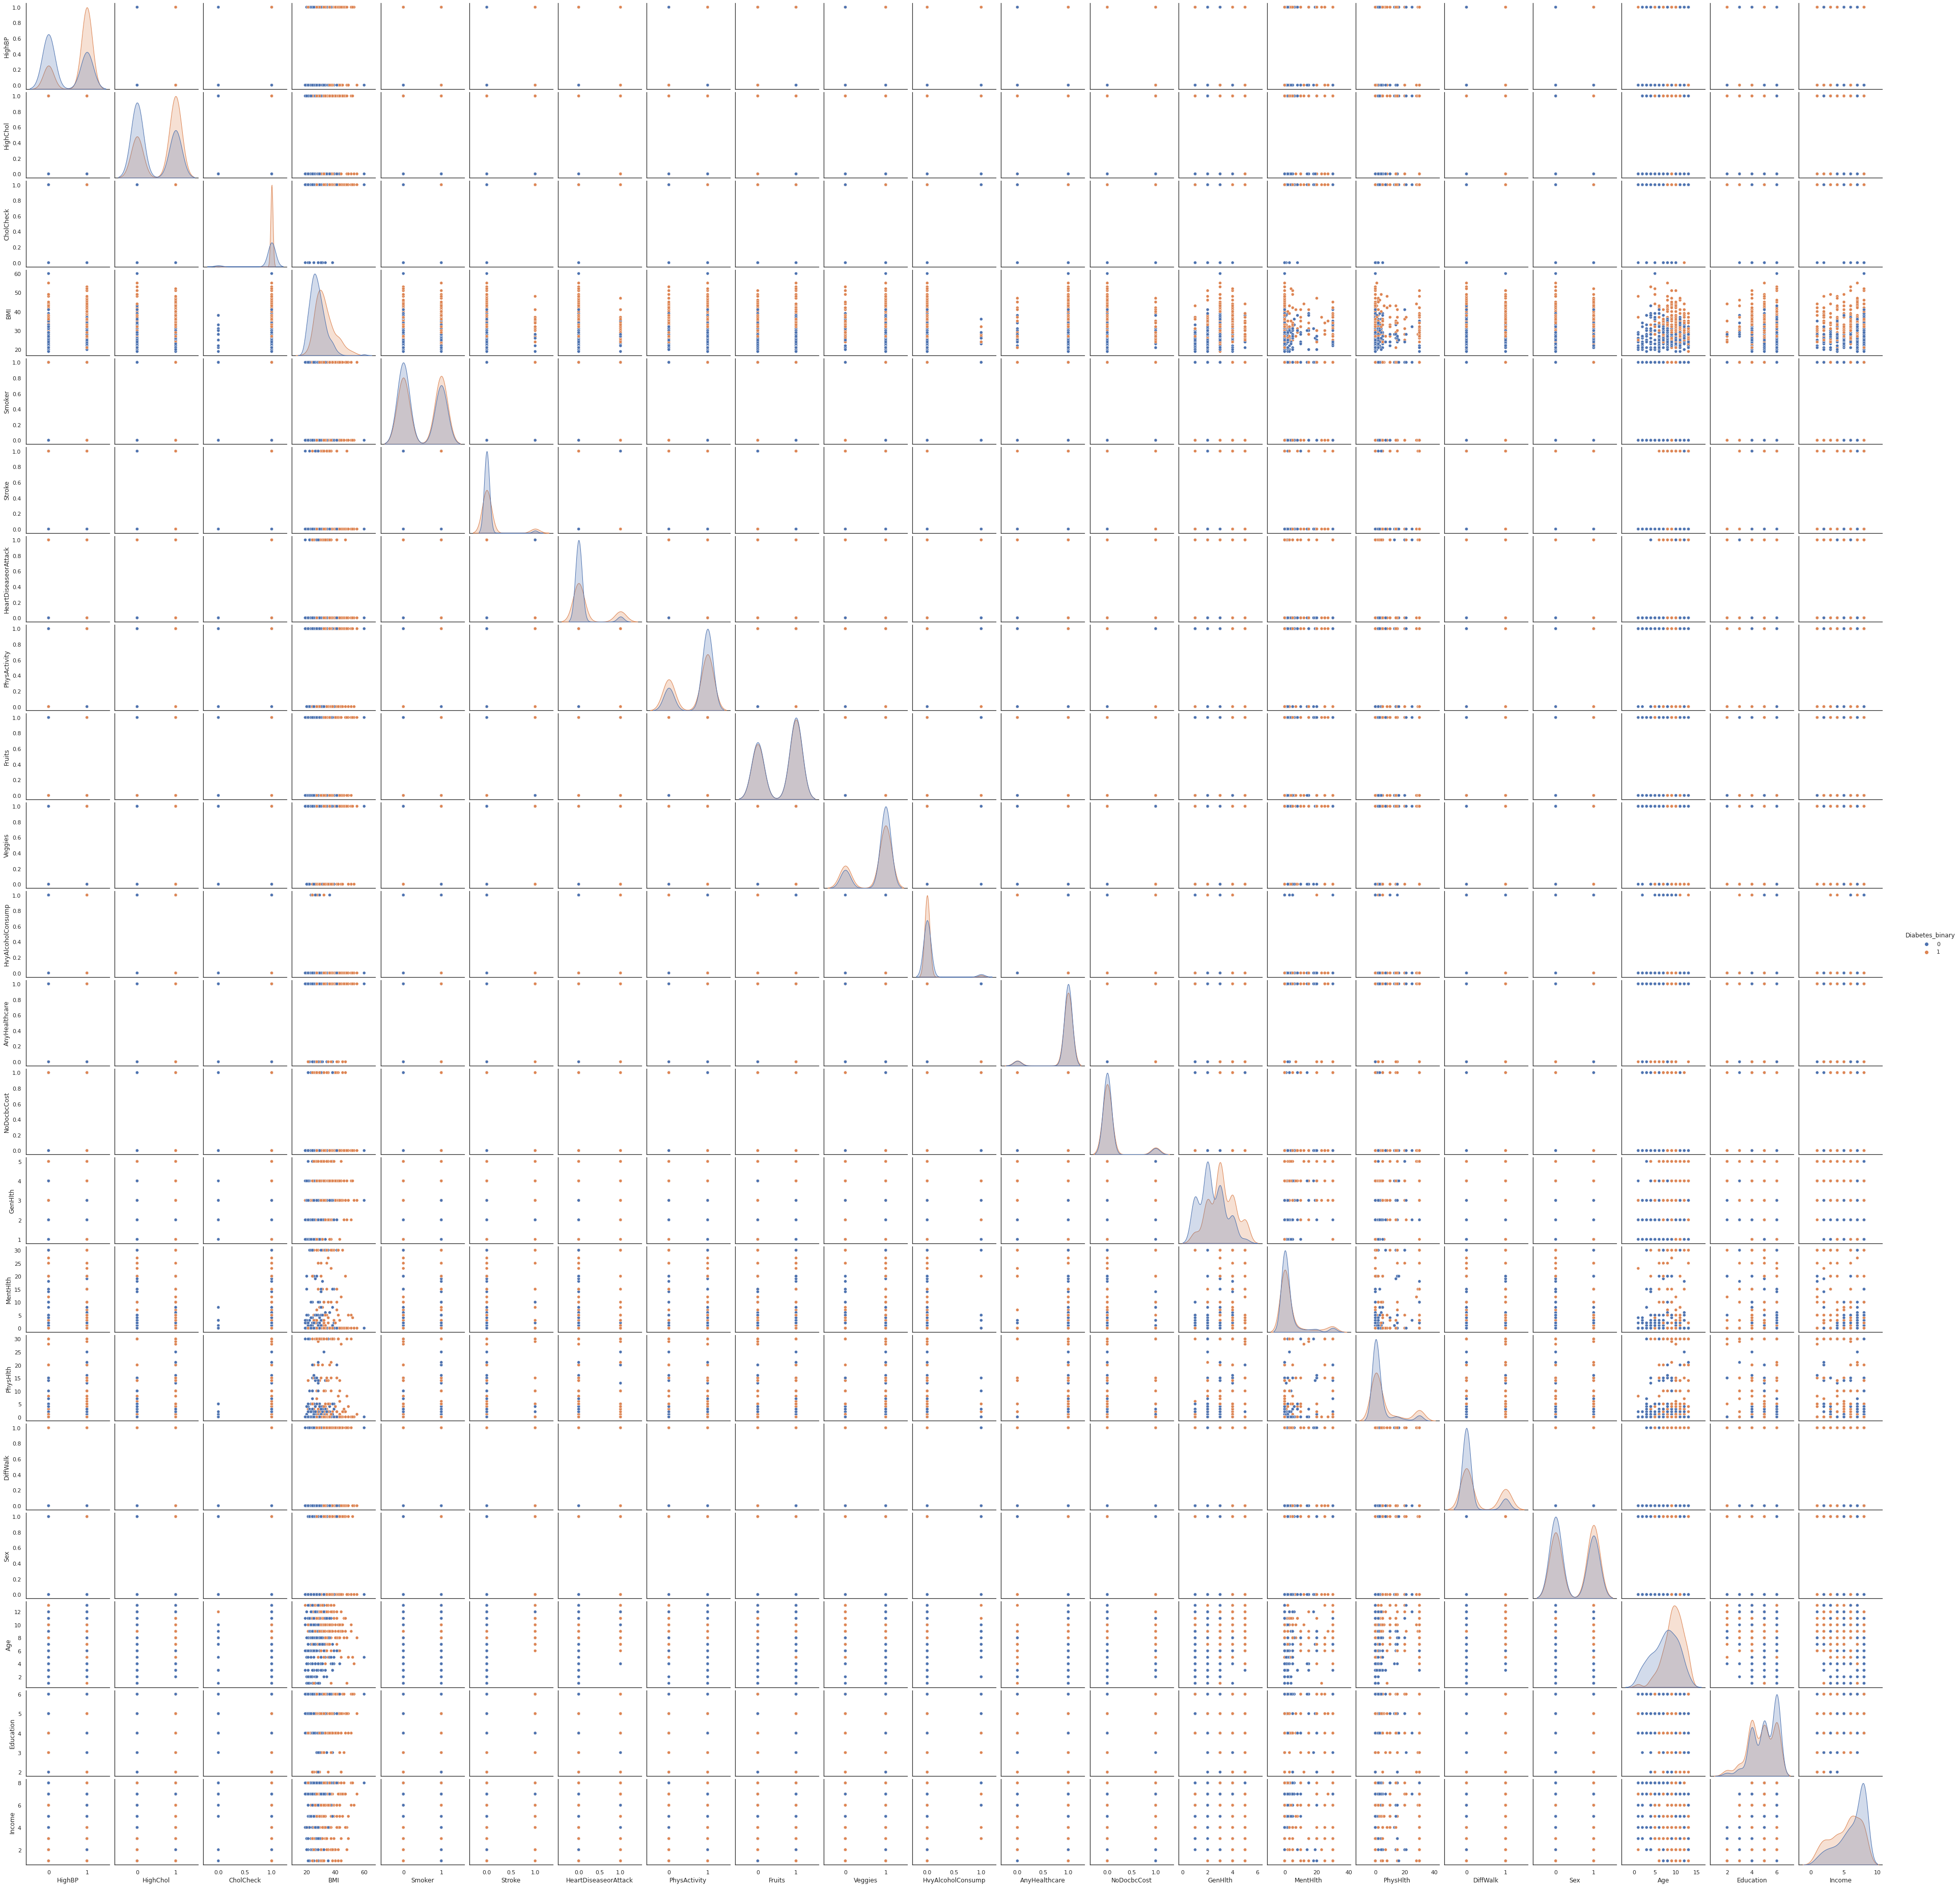

In [37]:
mini_data = data.sample(frac=1)
mini_data = mini_data[:500]
sns.pairplot(mini_data, hue='Diabetes_binary')

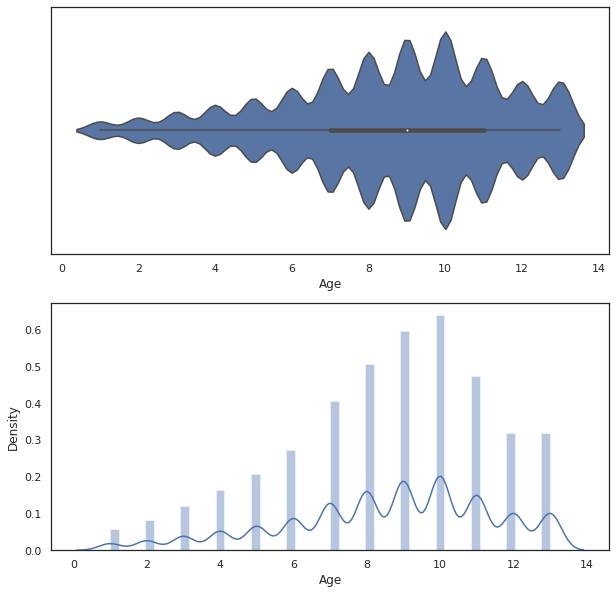

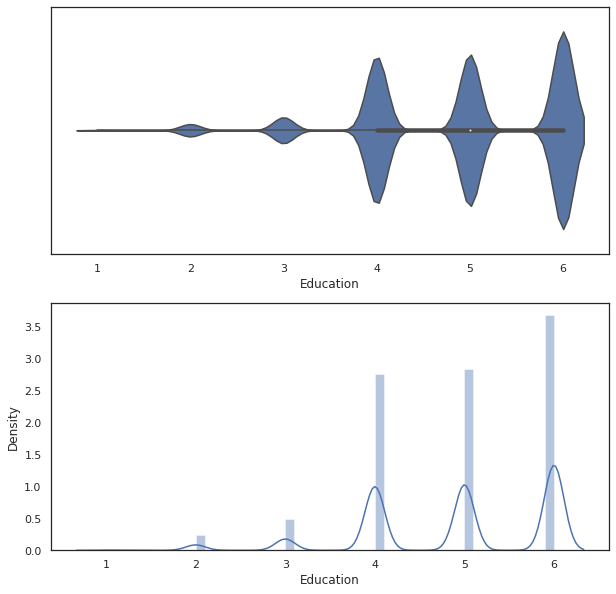

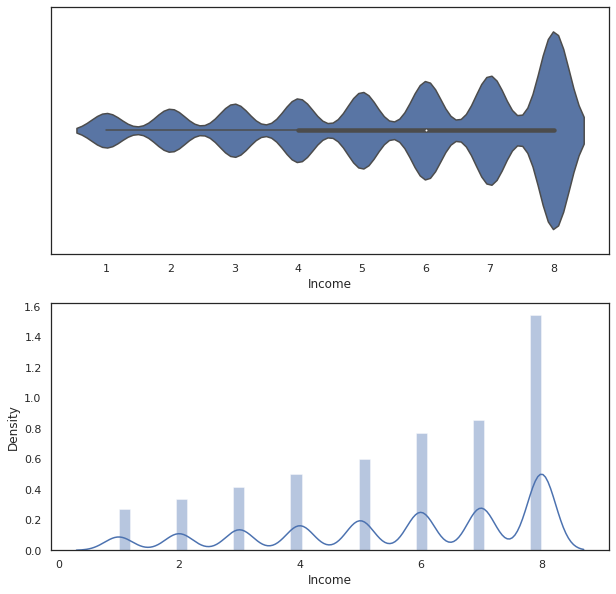

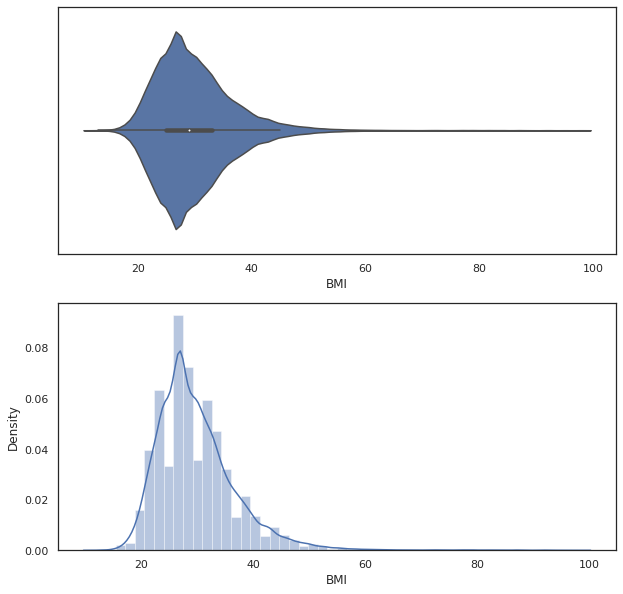

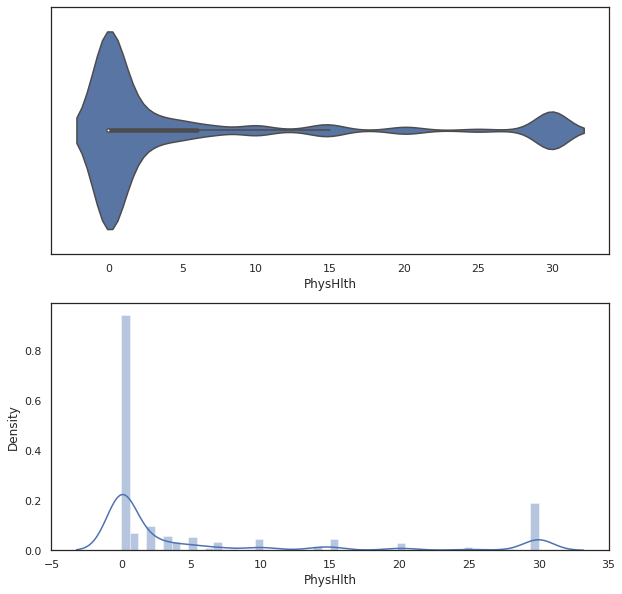

In [38]:
for col in ['Age', 'Education', 'Income', 'BMI', 'PhysHlth']:
    fig, ax = plt.subplots(2, 1, figsize=(10,10))
    sns.violinplot(ax=ax[0], x=data[col])
    sns.distplot(data[col], ax=ax[1])

### 3. Проведение корреляционного анализа данных.

<AxesSubplot:>

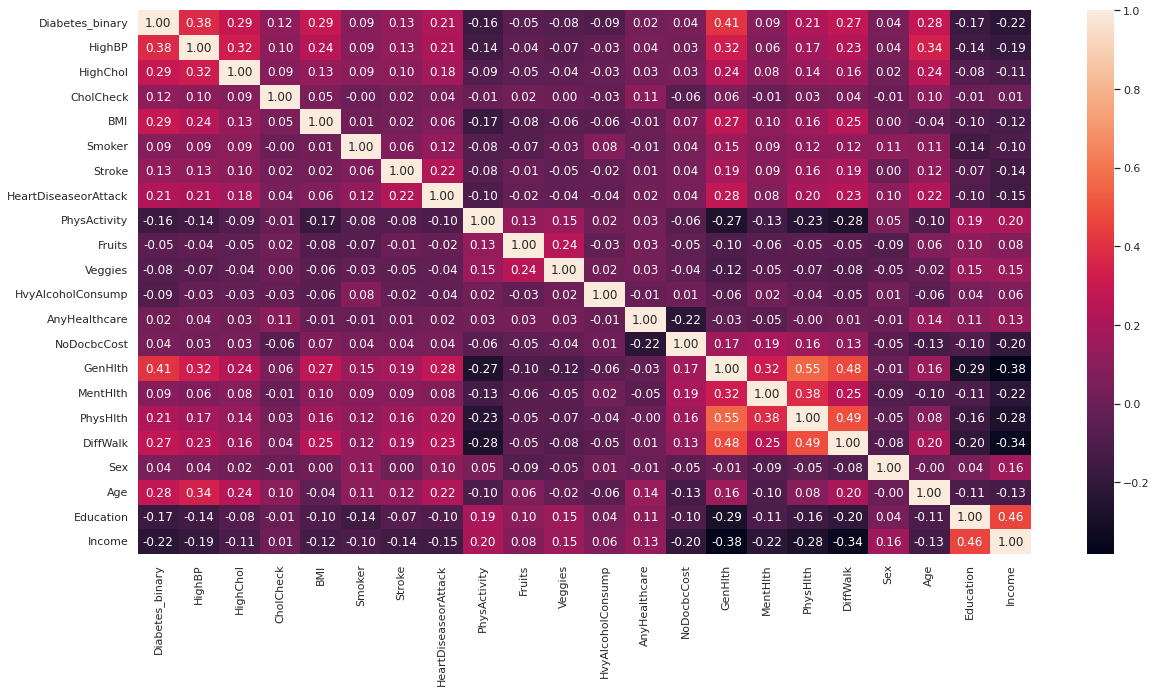

In [39]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [40]:
def correlation_fun(ds,threshold):
    corr_col=set()
    corr_mat=ds.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname=corr_mat.columns[i]
                corr_col.add(colname)
    return corr_col

In [41]:
threshold = 0.5

correlation_fun(data.drop("Diabetes_binary",axis=1),threshold)

{'PhysHlth'}

На основе данного анализа видим, что имеющиеся признаки не сильно коррелируют. Уберём, те колонки, где значение корреляции, слишком приближенно к нулю.
Это Sex, AnyHealthcare, NoDocbcCost, Fruits, PhysHlth.

In [42]:
drop_columns = ['Sex','AnyHealthcare', 'NoDocbcCost', 'Fruits', 'PhysHlth']


In [43]:
data=data.drop(drop_columns,axis=1)

In [44]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,DiffWalk,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,1,0,3,5,0,4,6,8
1,0,1,1,1,26,1,1,0,0,0,0,3,0,0,12,6,8
2,0,0,0,1,26,0,0,0,1,1,0,1,0,0,13,6,8
3,0,1,1,1,28,1,0,0,1,1,0,3,0,0,11,6,8
4,0,0,0,1,29,1,0,0,1,1,0,2,0,0,8,5,8


In [45]:
data.shape

(70692, 17)

### Выбор метрик для последующей оценки качества моделей.

**В качестве метрик для решения задачи классификации будем использовать:**

Метрики, формируемые на основе матрицы ошибок:

**Метрика precision:**

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$$ precision = \frac{TP}{TP+FP}$$



Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

**Метрика recall (полнота):**

$$ recall= \frac{TP}{TP+FN} $$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

Метрика F1-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_β$ - мера, которая вычисляется как среднее гармоническое от precision и recall:

$$ F_β=(1+β^2)⋅\frac{precision⋅recall}{precision+recall} $$

где $β$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $β$=1:


$$ F_1=2⋅\frac{precision⋅recall}{precision+recall} $$

Для вычисления используется функция f1_score.

Метрика ROC AUC

Основана на вычислении следующих характеристик:

$$ true PR=\frac{TP}{TP+FN} $$

True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$$ false PR=\frac{FP}{FP+TN} $$

False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

###  Выбор наиболее подходящих моделей для решения задачи классификации.

Для нашей задачи будем использовать следующие модели:
- Логистическая регрессия
- Решающее дерево
- Метод ближайших соседей
- Случайный лес
- Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [46]:
X = data.drop('Diabetes_binary', axis=1)
Y = data['Diabetes_binary']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [48]:
X_train.shape

(56553, 16)

In [49]:
X_test.shape

(14139, 16)

In [50]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

### Построение базового решения для выбранных моделей без подбора гиперпараметров. 

### Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [51]:
models = {  'LogisticRegression': LogisticRegression(),
            'KNearestNeighbors': KNeighborsClassifier(n_neighbors=5),
            'DecisionTree': DecisionTreeClassifier(),
            'RandomForest': RandomForestClassifier(),
            'GradientBoost': GradientBoostingClassifier()}

accuracies = {}

In [52]:
def DrawGraphics(Y_test, y_pred):
    print("**************************************************************")
    print(model_name)
    print("**************************************************************")
    print(classification_report(Y_test, y_pred))
    print(f'ROC AUC score: {roc_auc_score(Y_test, y_prob)}')
    print('Accuracy Score: ',accuracy_score(Y_test, y_pred))
    
    plt.figure(figsize = (6, 6))
    sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
    plt.yticks(rotation = 0)
    plt.show()  

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set_theme(style = 'white')
    plt.figure(figsize = (6, 6))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend()
    plt.show()

**************************************************************
LogisticRegression
**************************************************************
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      7141
           1       0.74      0.77      0.75      6998

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC score: 0.8276305683433108
Accuracy Score:  0.7484970648560718


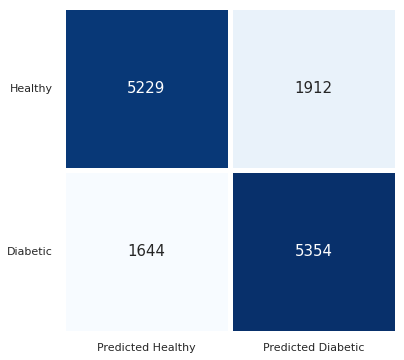

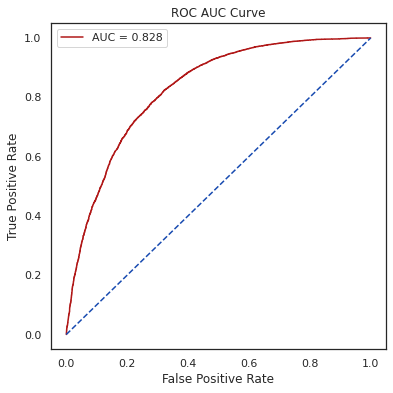

**************************************************************
KNearestNeighbors
**************************************************************
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      7141
           1       0.70      0.74      0.72      6998

    accuracy                           0.71     14139
   macro avg       0.72      0.71      0.71     14139
weighted avg       0.72      0.71      0.71     14139

ROC AUC score: 0.7720235069063084
Accuracy Score:  0.7146191385529387


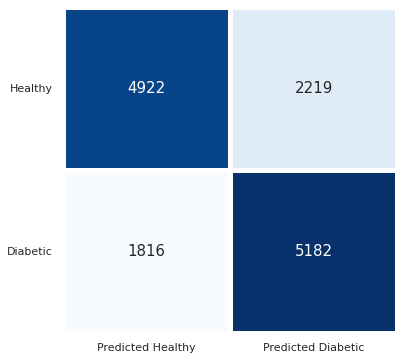

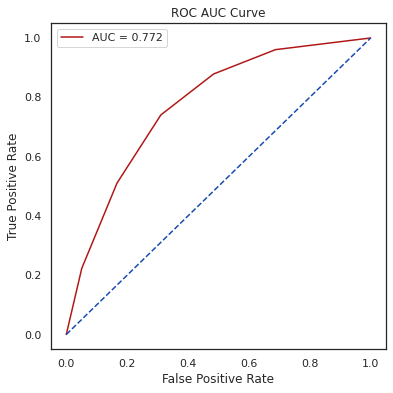

**************************************************************
DecisionTree
**************************************************************
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      7141
           1       0.66      0.64      0.65      6998

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139

ROC AUC score: 0.6607924047677376
Accuracy Score:  0.6619987269255252


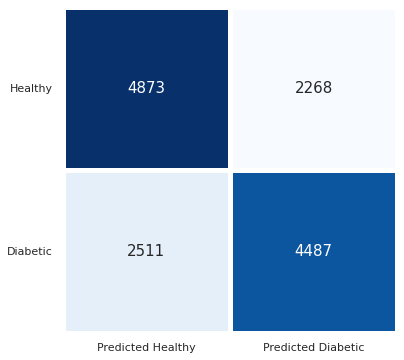

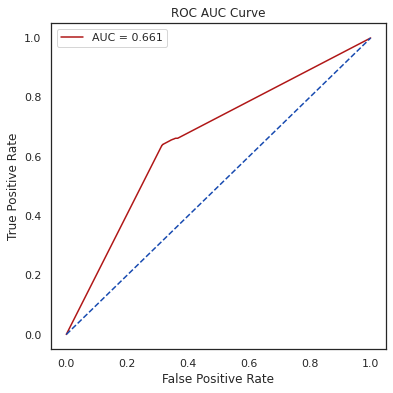

**************************************************************
RandomForest
**************************************************************
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      7141
           1       0.71      0.76      0.74      6998

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

ROC AUC score: 0.7999799910823342
Accuracy Score:  0.7293302213735059


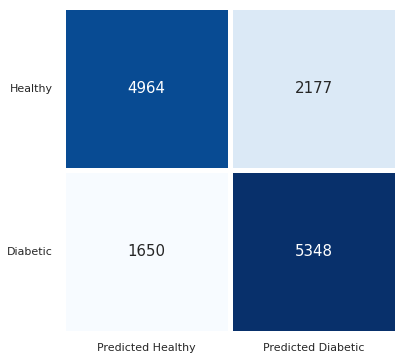

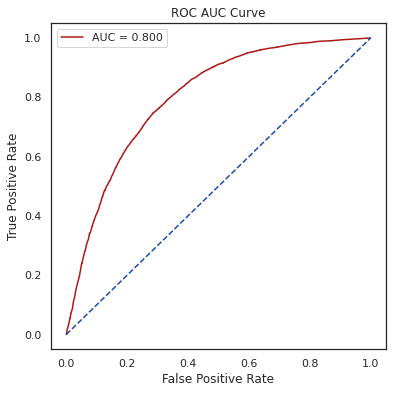

**************************************************************
GradientBoost
**************************************************************
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      7141
           1       0.73      0.79      0.76      6998

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

ROC AUC score: 0.8347393171610158
Accuracy Score:  0.7538015418346418


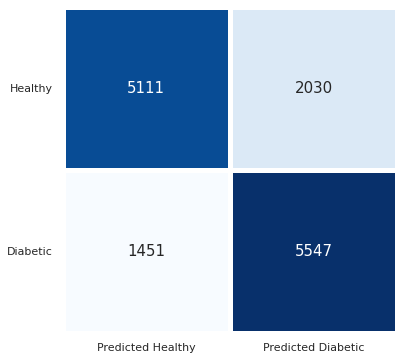

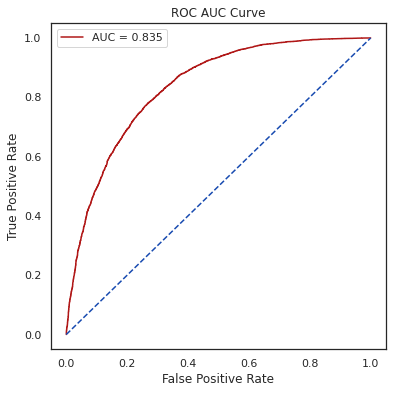

In [53]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(Y_test, y_pred)

    DrawGraphics(Y_test, y_pred)

    acc = accuracy_score(Y_test, y_pred)*100
    accuracies[model_name] = acc

In [54]:
n_range_list = list(range(0,250,50))
n_range_list[0] = 1
n_range_list

[1, 50, 100, 150, 200]

In [55]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
               (KNeighborsClassifier(),[{'n_neighbors':n_range_list}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':n_range_list,'criterion':['gini','entropy'],'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':n_range_list,'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}])]

In [56]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 74.67%
Best Parameters :  {'C': 0.5, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 74.08%
Best Parameters :  {'n_neighbors': 150}

----------------

DecisionTreeClassifier():
Best Accuracy : 65.79%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 72.84%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 75.01%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200, 'random_state': 0}

----------------



In [57]:
params_models = {  'LogisticRegression': LogisticRegression(C = 0.5, random_state= 0),
            'KNearestNeighbors': KNeighborsClassifier(n_neighbors=150),
            'DecisionTree': DecisionTreeClassifier(criterion='entropy',random_state=0),
            'RandomForest': RandomForestClassifier(criterion='gini',n_estimators=200,random_state=0),
            'GradientBoost': GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='exponential',n_estimators=200,random_state=0)}

params_accuracies = {}
params_precision = {}
params_recall = {}
params_f1 = {}
params_roc_auc = {}

**************************************************************
LogisticRegression
**************************************************************
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      7141
           1       0.74      0.77      0.75      6998

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

ROC AUC score: 0.827631468834655
Accuracy Score:  0.7484970648560718


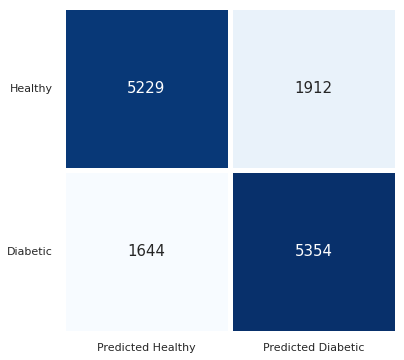

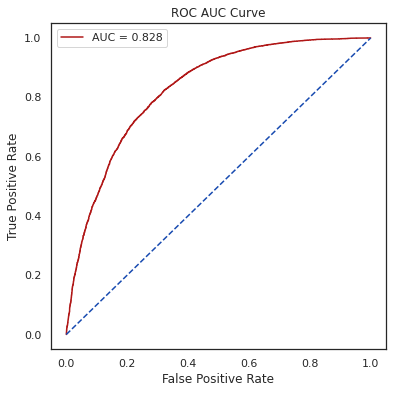

**************************************************************
KNearestNeighbors
**************************************************************
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      7141
           1       0.72      0.79      0.75      6998

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139

ROC AUC score: 0.8216396794747087
Accuracy Score:  0.7423438715609307


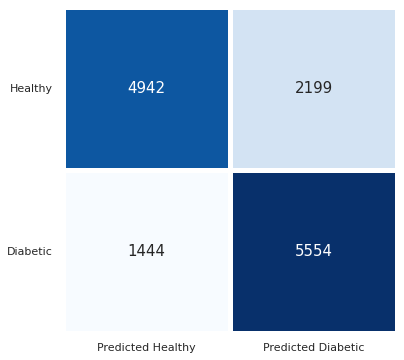

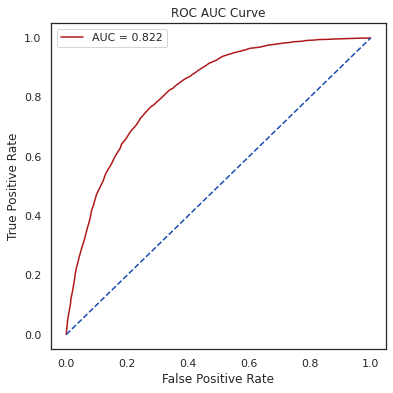

**************************************************************
DecisionTree
**************************************************************
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      7141
           1       0.67      0.64      0.66      6998

    accuracy                           0.67     14139
   macro avg       0.67      0.67      0.67     14139
weighted avg       0.67      0.67      0.67     14139

ROC AUC score: 0.6652005200117392
Accuracy Score:  0.6661715821486668


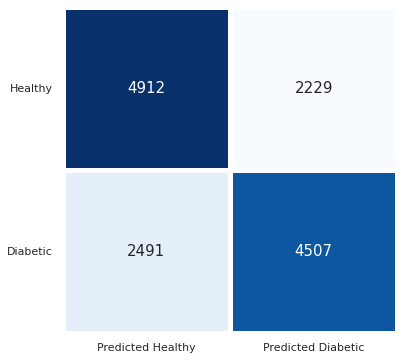

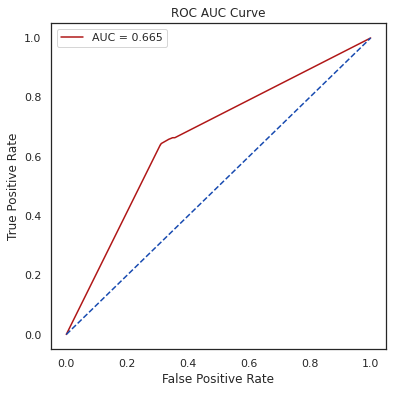

**************************************************************
RandomForest
**************************************************************
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      7141
           1       0.71      0.77      0.74      6998

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

ROC AUC score: 0.800058894134996
Accuracy Score:  0.7318763703232195


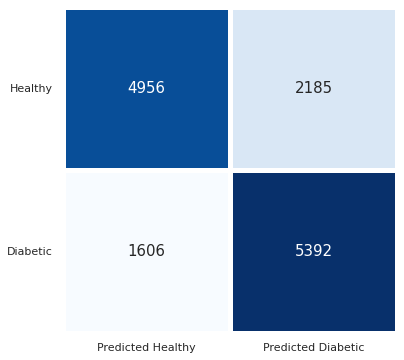

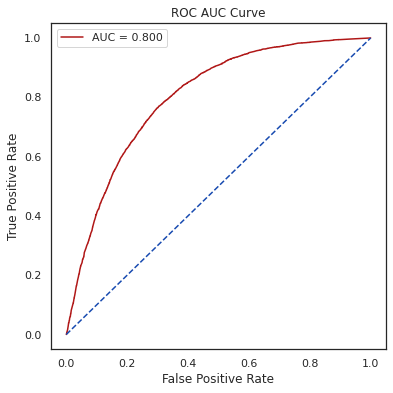

**************************************************************
GradientBoost
**************************************************************
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      7141
           1       0.73      0.80      0.76      6998

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139

ROC AUC score: 0.8349524634621635
Accuracy Score:  0.7564891435037838


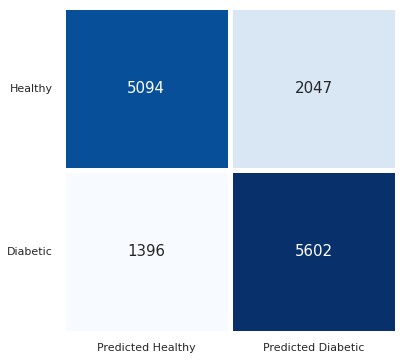

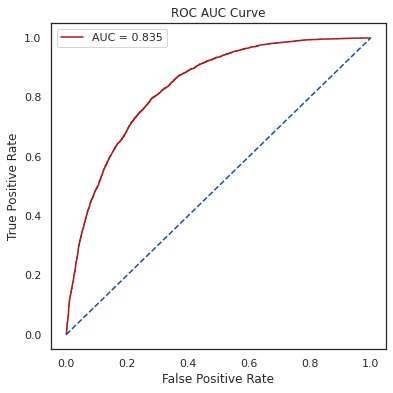

In [58]:
for model_name, model in params_models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(Y_test, y_pred)

    DrawGraphics(Y_test, y_pred)

    param_acc = accuracy_score(Y_test, y_pred)*100
    params_accuracies[model_name] = param_acc
    params_precision[model_name] = precision_score(Y_test, y_pred)
    params_recall[model_name] = recall_score(Y_test, y_pred)
    params_f1[model_name] = f1_score(Y_test, y_pred)
    params_roc_auc[model_name] = roc_auc_score(Y_test,y_pred)

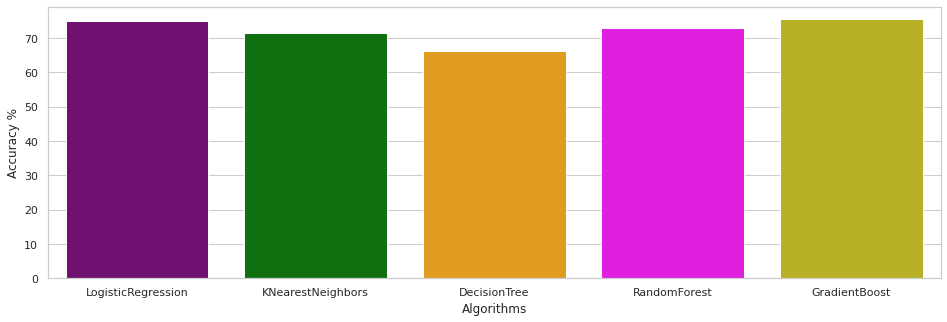

In [59]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

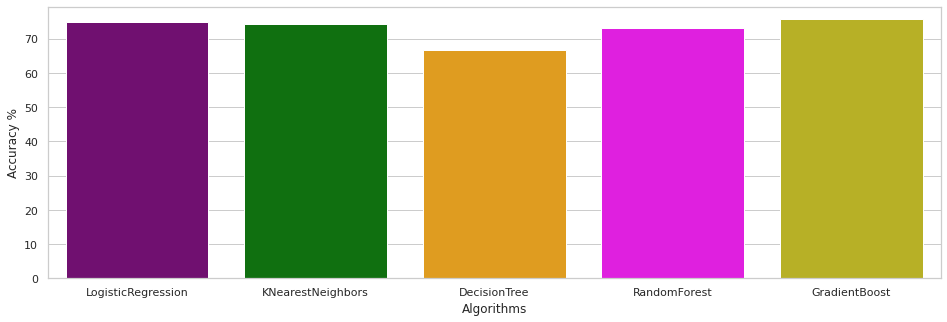

In [60]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(params_accuracies.keys()), y=list(params_accuracies.values()), palette=colors)
plt.show()

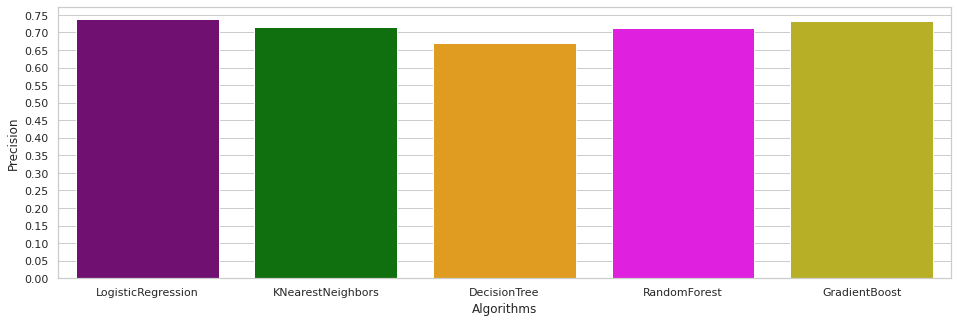

In [64]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.ylabel("Precision")
plt.xlabel("Algorithms")
sns.barplot(x=list(params_accuracies.keys()), y=list(params_precision.values()), palette=colors)
plt.show()

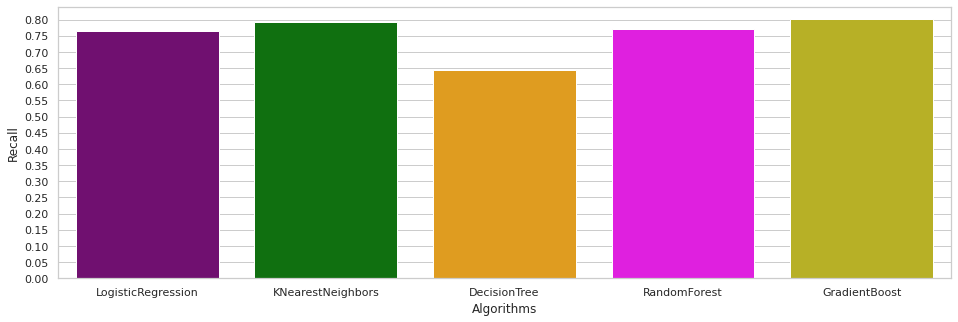

In [68]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.ylabel("Recall")
plt.xlabel("Algorithms")
sns.barplot(x=list(params_accuracies.keys()), y=list(params_recall.values()), palette=colors)
plt.show()

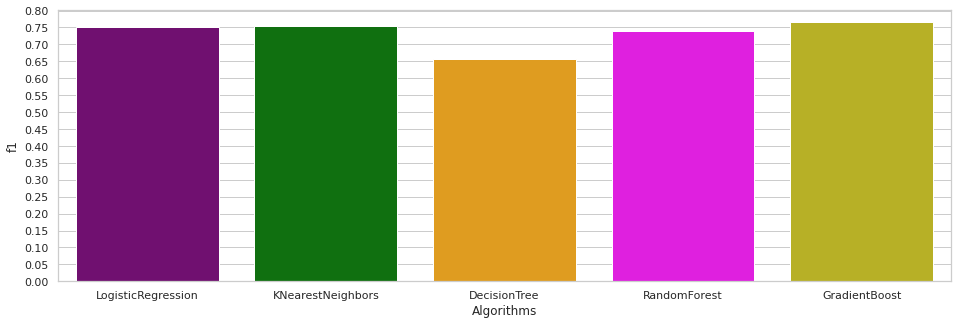

In [66]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.ylabel("f1")
plt.xlabel("Algorithms")
sns.barplot(x=list(params_accuracies.keys()), y=list(params_f1.values()), palette=colors)
plt.show()

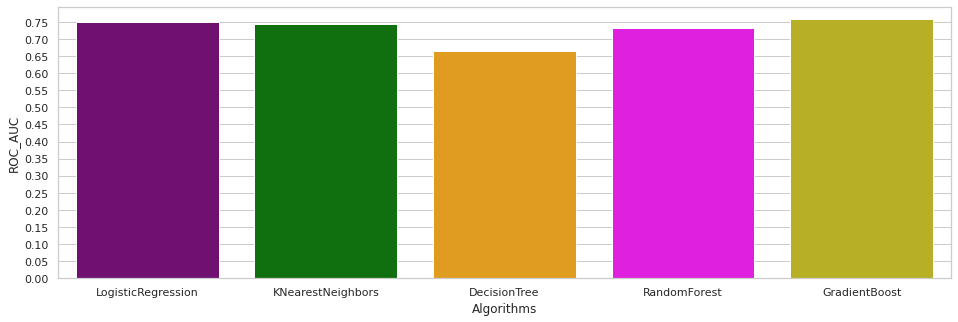

In [69]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.ylabel("ROC_AUC")
plt.xlabel("Algorithms")
sns.barplot(x=list(params_accuracies.keys()), y=list(params_roc_auc.values()), palette=colors)
plt.show()

Вывод: лучшей моделью оказалась модель на основе Градиентного Бустинга.